## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def model_JCA(rho_0, alpha_inf, sigma_rf,
              phi, eta, lamb, omega,
              gamma, P_0, Pr, lamb_linha):

   omega=omega*2*np.pi

   rho_omega = ((rho_0*alpha_inf))*(1+(((sigma_rf*phi)/(1j*omega*rho_0*alpha_inf))*np.sqrt(1+(1j*((4*eta*omega*rho_0*(alpha_inf**2))/((sigma_rf**2)*(lamb**2)*(phi**2)))))))

   K_omega = (gamma*P_0)/(gamma - ((gamma-1)*((1+(((8*eta)/(1j*omega*Pr*rho_0*(lamb_linha**2)))*np.sqrt(1+((1j*omega*Pr*rho_0*(lamb_linha**2))/(16*eta)))))**(-1))))

   return rho_omega, K_omega

In [ ]:
def model_JCAL(rho_0, alpha_inf, sigma_rf,
              phi, eta, lamb, omega,
              gamma, P_0, Pr, lamb_linha,
              q_0, q_0_linha):

   omega=omega*2*np.pi

   rho_omega = ((rho_0*alpha_inf)/1)*(1+(((eta*phi)/(1j*omega*rho_0*q_0*alpha_inf))*np.sqrt(1+(1j*((4*omega*rho_0*(alpha_inf**2)*(q_0**2))/((eta)*(lamb**2)*(phi**2)))))))

   K_omega = (gamma*P_0)/(gamma - ((gamma-1)*((1+(((phi*eta)/(1j*omega*Pr*rho_0*q_0_linha))*np.sqrt(1+((1j*4*omega*Pr*rho_0*(q_0_linha**2))/(eta*(lamb_linha**2)*(phi**2))))))**(-1))))

   return rho_omega, K_omega

## Definição de Parâmetros

In [ ]:
## Propriedades do Material (Melamina)
sigma_rf = 12627 #Resistividade ao Fluxo
phi = 0.9 #Porosidade
alpha_inf = 1 #Tortuosidade
lamb = 91e-6 #Comprimento Característico Viscoso
lamb_linha = 148e-6 #Comprimento Característico Térmico
rho_m = 10 #Densidade do Material
q_0 = 14.57e-10 #Permeabilidade Estática Viscosa
q_0_linha = 14.57e-10 #Permeabilidade Térmica

In [ ]:
## Propriedades do Fluido (Ar)
P_0 = 101320 #Pressão Atmosférica
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
gamma = 1.4 #Razão entre Capacidades Térmicas
eta = 1.84e-5 #Viscosidade Dinãmica do ar
Pr = 0.71 #Número de Prandtl
Z_0 = rho_0*c_0 #Impedância do ar

## Parâmetros: Densidade Efetiva, Módulo de Compressibilidade Efetivo, Número de Onda Complexa, Velocidade do Som Complexa

In [ ]:
## Definição do Vetor de Frequências
omega = np.arange(50,6000,1)
## Cáluclo da Densidade Efetiva e Módulo de Compressinilidade Efetivo - Modelo JCA
rho_JCA, K_JCA = model_JCA(rho_0=rho_0,
                           alpha_inf=alpha_inf,
                           sigma_rf=sigma_rf,
                           phi=phi,
                           eta=eta,
                           lamb=lamb,
                           omega=omega,
                           gamma=gamma,
                           P_0=P_0,
                           Pr=Pr,
                           lamb_linha=lamb_linha)
## Cáluclo da Densidade Efetiva e Módulo de Compressinilidade Efetivo - Modelo JCAL
rho_JCAL, K_JCAL = model_JCAL(rho_0=rho_0,
                              alpha_inf=alpha_inf,
                              sigma_rf=sigma_rf,
                              phi=phi,
                              eta=eta,
                              lamb=lamb,
                              omega=omega,
                              gamma=gamma,
                              P_0=P_0,
                              Pr=Pr,
                              lamb_linha=lamb_linha,
                              q_0=q_0,
                              q_0_linha=q_0_linha)

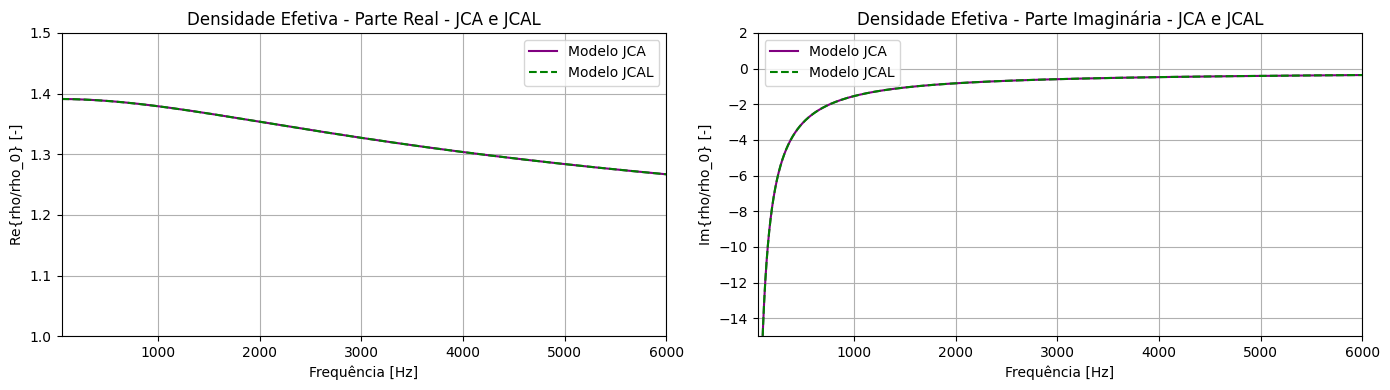

In [ ]:
## Plot da Densidade Efetiva - Parte Real e Imaginária - Modelos JCA e JCAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
ax1.plot(omega, np.real(rho_JCA/rho_0), label='Modelo JCA', color='purple')
ax1.plot(omega, np.real(rho_JCAL/rho_0), '--', label='Modelo JCAL', color='green')
ax1.set_title('Densidade Efetiva - Parte Real - JCA e JCAL')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{rho/rho_0} [-]')
ax1.set_xlim([50,6000])
ax1.set_ylim([1,1.5])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
ax2.plot(omega, np.imag(rho_JCA/rho_0), label='Modelo JCA', color='purple')
ax2.plot(omega, np.imag(rho_JCAL/rho_0),'--', label='Modelo JCAL', color='green')
ax2.set_title('Densidade Efetiva - Parte Imaginária - JCA e JCAL')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{rho/rho_0} [-]')
ax2.set_xlim([50,6000])
ax2.set_ylim([-15,2])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

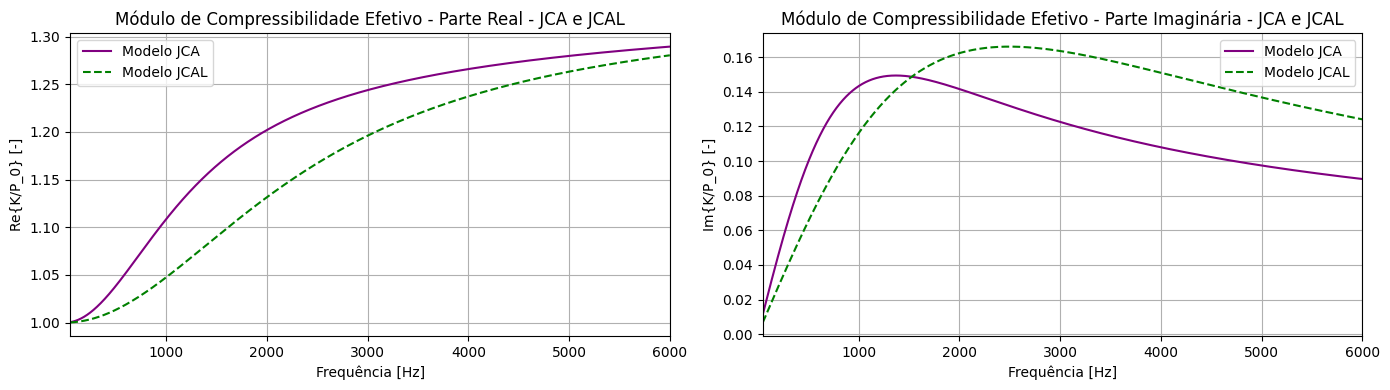

In [ ]:
## Plot da Módulo de Compressibilidade Efetivo - Parte Real e Imaginária - Modelos JCA e JCAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
ax1.plot(omega, np.real(K_JCA/P_0), label='Modelo JCA', color='purple')
ax1.plot(omega, np.real(K_JCAL/P_0), '--', label='Modelo JCAL', color='green')
ax1.set_title('Módulo de Compressibilidade Efetivo - Parte Real - JCA e JCAL')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{K/P_0} [-]')
ax1.set_xlim([50,6000])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
ax2.plot(omega, np.imag(K_JCA/P_0), label='Modelo JCA', color='purple')
ax2.plot(omega, np.imag(K_JCAL/P_0),'--', label='Modelo JCAL', color='green')
ax2.set_title('Módulo de Compressibilidade Efetivo - Parte Imaginária - JCA e JCAL')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{K/P_0} [-]')
ax2.set_xlim([50,6000])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
##Cálculo do Número de Onda Complexo
k_JCA = (omega*2*np.pi) * np.sqrt(rho_JCA/K_JCA)
k_JCAL = (omega*2*np.pi) * np.sqrt(rho_JCAL/K_JCAL)

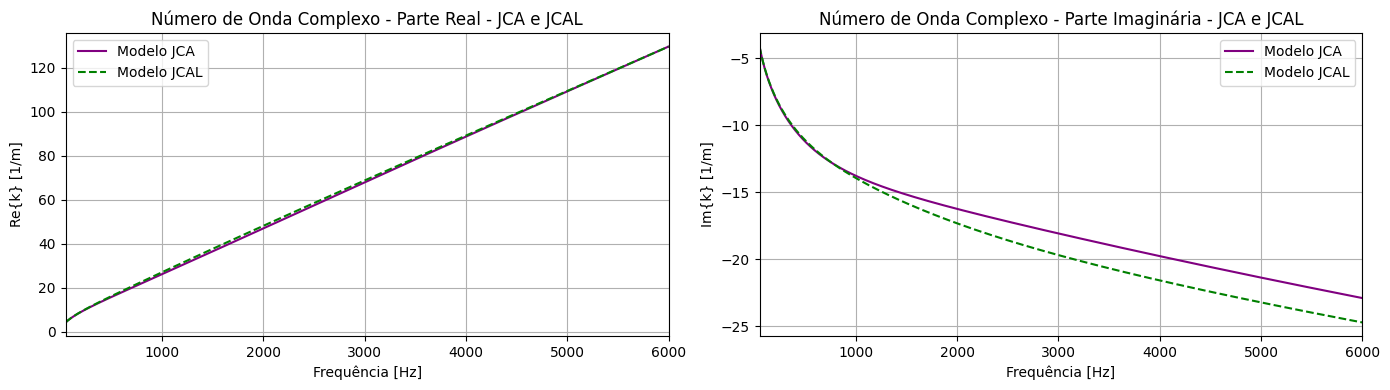

In [ ]:
## Plot do Número de Onda Complexo - Parte Real e Imaginária - Modelos JCA e JCAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
ax1.plot(omega, np.real(k_JCA), label='Modelo JCA', color='purple')
ax1.plot(omega, np.real(k_JCAL), '--', label='Modelo JCAL', color='green')
ax1.set_title('Número de Onda Complexo - Parte Real - JCA e JCAL')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{k} [1/m]')
ax1.set_xlim([50,6000])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
ax2.plot(omega, np.imag(k_JCA), label='Modelo JCA', color='purple')
ax2.plot(omega, np.imag(k_JCAL),'--', label='Modelo JCAL', color='green')
ax2.set_title('Número de Onda Complexo - Parte Imaginária - JCA e JCAL')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{k} [1/m]')
ax2.set_xlim([50,6000])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
## Cálculo da Velocidade do Som Complexa
c_JCA = (omega*2*np.pi) / k_JCA
c_JCAL = (omega*2*np.pi) / k_JCAL

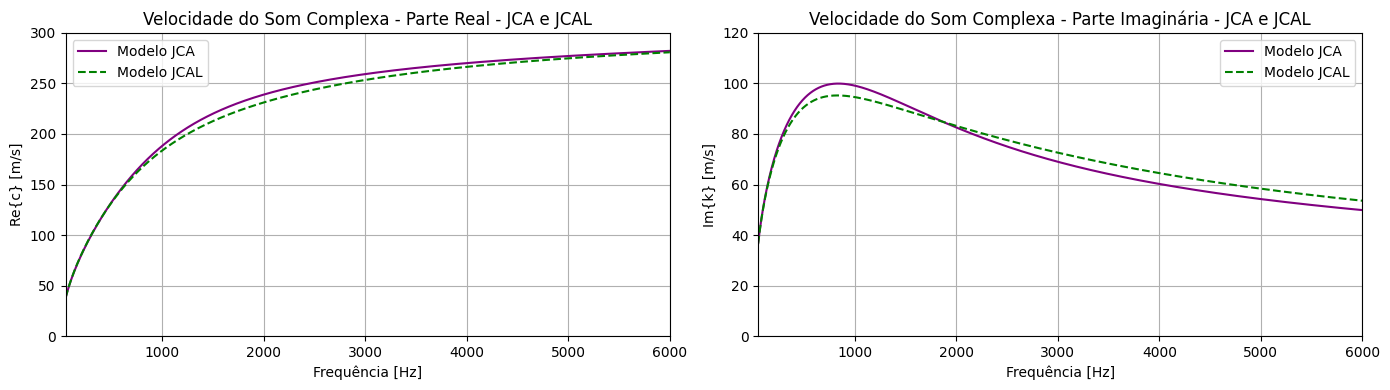

In [ ]:
## Plot do Velocidade do Som Complexa - Parte Real e Imaginária - Modelos JCA e JCAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
ax1.plot(omega, np.real(c_JCA), label='Modelo JCA', color='purple')
ax1.plot(omega, np.real(c_JCAL), '--', label='Modelo JCAL', color='green')
ax1.set_title('Velocidade do Som Complexa - Parte Real - JCA e JCAL')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{c} [m/s]')
ax1.set_xlim([50,6000])
ax1.set_ylim([0,300])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
ax2.plot(omega, np.imag(c_JCA), label='Modelo JCA', color='purple')
ax2.plot(omega, np.imag(c_JCAL),'--', label='Modelo JCAL', color='green')
ax2.set_title('Velocidade do Som Complexa - Parte Imaginária - JCA e JCAL')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{k} [m/s]')
ax2.set_xlim([50,6000])
ax2.set_ylim([0,120])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

## Parâmetros: Impedância de superfície e Coeficiente de absorção sonora. Para duas espessuras: 37mm e 50mm.

In [ ]:
## Definindo as espessuras
e1 = 37e-3
e2= 50e-3

In [ ]:
## Cálculo da Impedância Característica
Zc_JCA = np.sqrt(rho_JCA*K_JCA)
Zc_JCAL = np.sqrt(rho_JCAL*K_JCAL)

In [ ]:
##Cálculo da Impedância de Superfície - 37mm
Zs_JCA_e1 = -1j*(Zc_JCA/phi)*(1/np.tan(k_JCA*e1))
Zs_JCAL_e1 = -1j*(Zc_JCAL/phi)*(1/np.tan(k_JCAL*e1))
##Cálculo da Impedância de Superfície - 50mm
Zs_JCA_e2 = -1j*(Zc_JCA/phi)*(1/np.tan(k_JCA*e2))
Zs_JCAL_e2 = -1j*(Zc_JCAL/phi)*(1/np.tan(k_JCAL*e2))

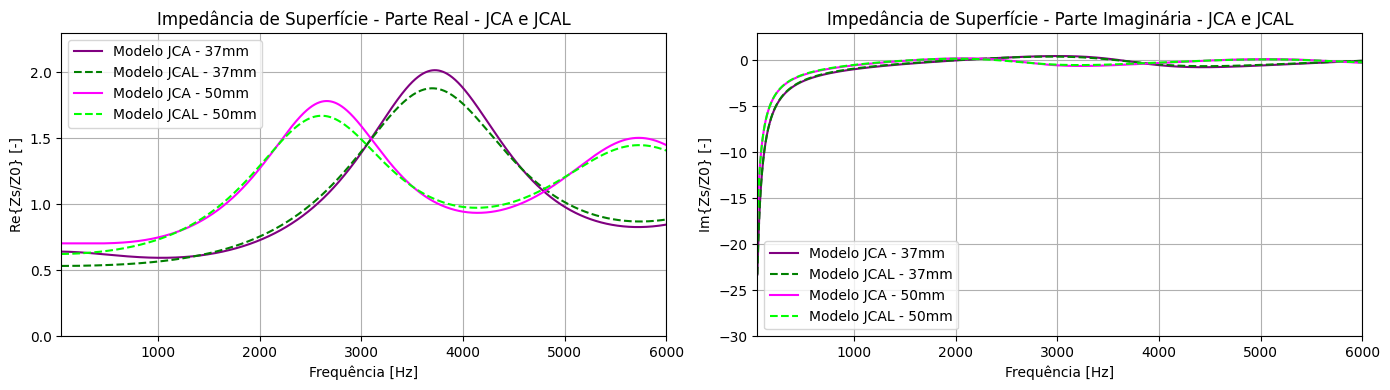

In [ ]:
## Plot da Impedância de Superfície - Parte Real e Imaginária - Modelos JCA e JCAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# Gráfico da parte real
ax1.plot(omega, np.real(Zs_JCA_e1/Z_0), label='Modelo JCA - 37mm', color='purple')
ax1.plot(omega, np.real(Zs_JCAL_e1/Z_0), '--', label='Modelo JCAL - 37mm', color='green')
ax1.plot(omega, np.real(Zs_JCA_e2/Z_0), label='Modelo JCA - 50mm', color='magenta')
ax1.plot(omega, np.real(Zs_JCAL_e2/Z_0), '--', label='Modelo JCAL - 50mm', color='lime')
ax1.set_title('Impedância de Superfície - Parte Real - JCA e JCAL')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('Re{Zs/Z0} [-]')
ax1.set_xlim([50,6000])
ax1.set_ylim([0,2.3])
ax1.grid(True)
ax1.legend()
# Gráfico da parte imaginária
ax2.plot(omega, np.imag(Zs_JCA_e1/Z_0), label='Modelo JCA - 37mm', color='purple')
ax2.plot(omega, np.imag(Zs_JCAL_e1/Z_0), '--', label='Modelo JCAL - 37mm', color='green')
ax2.plot(omega, np.imag(Zs_JCA_e2/Z_0), label='Modelo JCA - 50mm', color='magenta')
ax2.plot(omega, np.imag(Zs_JCAL_e2/Z_0), '--', label='Modelo JCAL - 50mm', color='lime')
ax2.set_title('Impedância de Superfície - Parte Imaginária - JCA e JCAL')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Im{Zs/Z0} [-]')
ax2.set_xlim([50,6000])
ax2.set_ylim([-30,3])
ax2.grid(True)
ax2.legend()
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [ ]:
##Cálculo do Coeficiente de Absorção - 37mm
alpha_JCA_e1 = 1-(np.abs((Zs_JCA_e1-Z_0)/(Zs_JCA_e1+Z_0))**2)
alpha_JCAL_e1 = 1-(np.abs((Zs_JCAL_e1-Z_0)/(Zs_JCAL_e1+Z_0))**2)
##Cálculo do Coeficiente de Absorção - 50mm
alpha_JCA_e2 = 1-(np.abs((Zs_JCA_e2-Z_0)/(Zs_JCA_e2+Z_0))**2)
alpha_JCAL_e2 = 1-(np.abs((Zs_JCAL_e2-Z_0)/(Zs_JCAL_e2+Z_0))**2)

In [ ]:
## Função para calcular frequência onde absorção é maior que 90%
def add_vertical_line(ax, omega, alpha, color, threshold=0.9):
    freqs = omega[alpha > threshold]
    ax.axvline(freqs[0], color=color, linestyle='--', linewidth=1, label=f'alpha > 90% => {freqs[0]} Hz' )

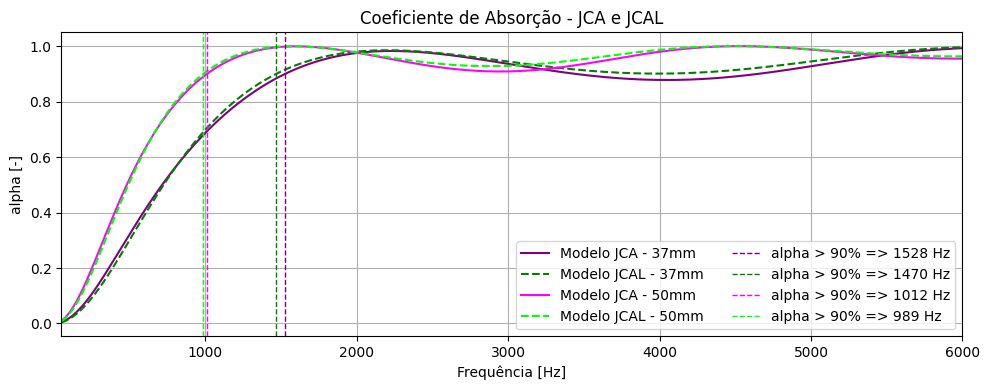

In [ ]:
## Plot da Coeficiente de Absorção - Modelos JCA e JCAL
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(omega, alpha_JCA_e1, label='Modelo JCA - 37mm', color='purple')
ax.plot(omega, alpha_JCAL_e1, '--', label='Modelo JCAL - 37mm', color='green')
ax.plot(omega, alpha_JCA_e2, label='Modelo JCA - 50mm', color='magenta')
ax.plot(omega, alpha_JCAL_e2, '--', label='Modelo JCAL - 50mm', color='lime')
add_vertical_line(ax, omega, alpha_JCA_e1, 'purple')
add_vertical_line(ax, omega, alpha_JCAL_e1, 'green')
add_vertical_line(ax, omega, alpha_JCA_e2, 'magenta')
add_vertical_line(ax, omega, alpha_JCAL_e2, 'lime')
ax.set_title('Coeficiente de Absorção - JCA e JCAL')
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('alpha [-]')
ax.set_xlim([50,6000])
ax.grid(True)
ax.legend(ncol=2)
# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()